In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import snowflake.connector
# from snowflake.snowpark.context import get_active_session
import os
# session = get_active_session()
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
conn = snowflake.connector.connect(
    user=os.getenv('USERNAME_2'),
    password=os.getenv('SNOWSQL_PWD'),
    account=os.getenv('ACCOUNT_NAME'),
    database=os.getenv('DATABASE'),
    schema=os.getenv('SCHEMA'),
    warehouse=os.getenv('WAREHOUSE'),
    login_timeout=60,
    client_session_keep_alive=True 
)

In [3]:
cursor = conn.cursor()
query = 'Select message_type from message_tbl where message_type IS NOT NULL'
cursor.execute(query)
result = cursor.fetchall()

In [4]:
message_type_df = pd.DataFrame(result, columns=[col[0] for col in cursor.description])

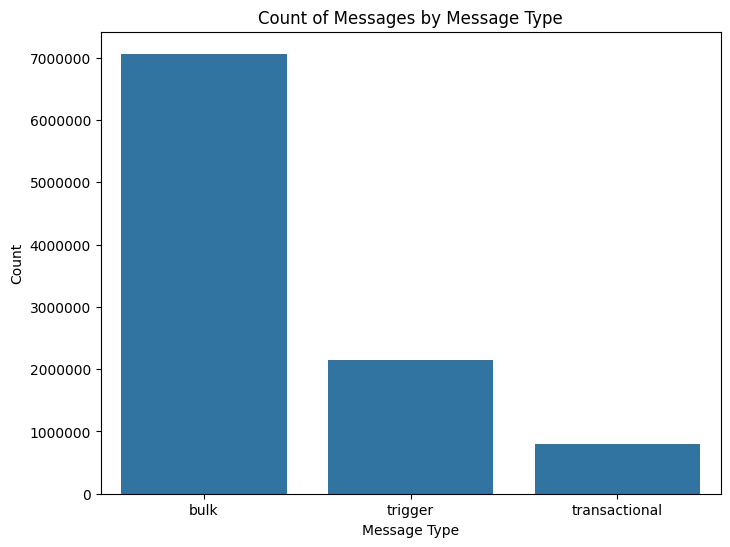

In [7]:
# Assuming you have a DataFrame named 'messages_df' with a column named 'message_type'
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='MESSAGE_TYPE', data=message_type_df)
plt.title('Count of Messages by Message Type')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [8]:
query = 'Select dates from message_tbl where dates IS NOT NULL'
cursor.execute(query)
result = cursor.fetchall()

In [9]:
messages_df = pd.DataFrame(result, columns=[col[0] for col in cursor.description])

In [13]:
dtypes = {'DATES': 'datetime64[ns]'}
messages_df = messages_df.astype(dtypes)

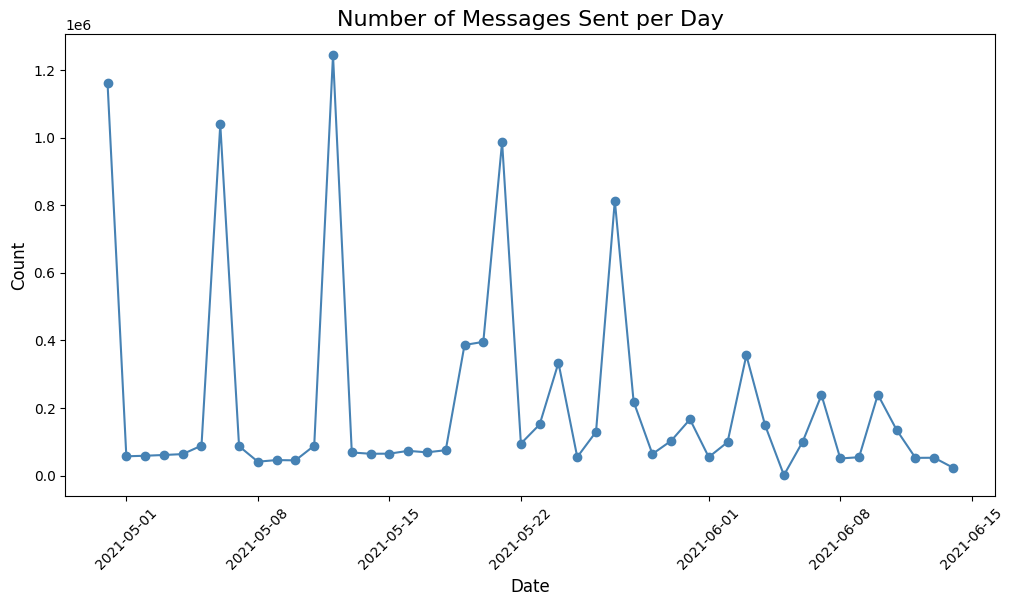

In [14]:
plt.figure(figsize=(12, 6))
messages_by_day = messages_df.groupby(messages_df['DATES'].dt.date).size()
messages_by_day.plot(kind='line', marker='o', color='steelblue')
plt.title('Number of Messages Sent per Day', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [18]:
query = 'Select channel from message_tbl where channel IS NOT NULL'
cursor.execute(query)
result = cursor.fetchall()

In [19]:
messages_df = pd.DataFrame(result, columns=[col[0] for col in cursor.description])

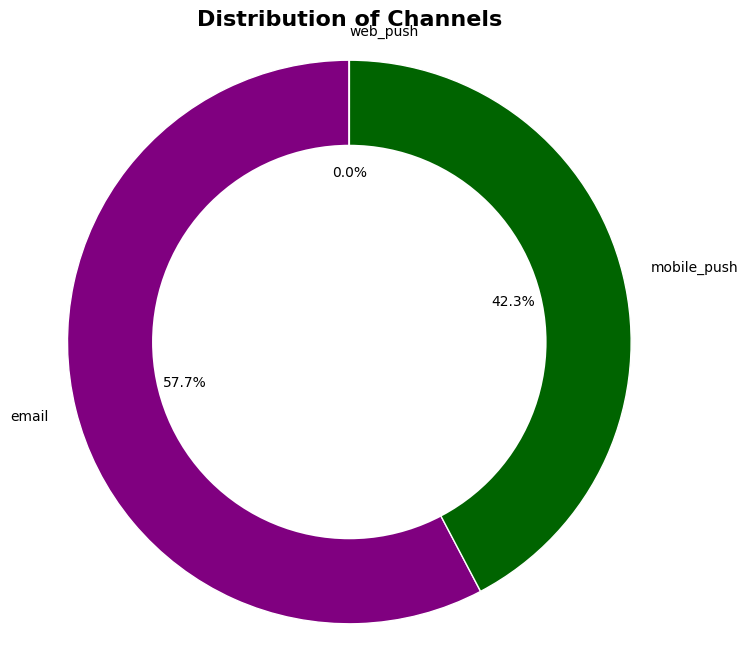

In [20]:
plt.figure(figsize=(8, 8))
channel_counts = messages_df['CHANNEL'].value_counts()
colors = ['purple', 'darkgreen','yellow']

# Explode the largest slice
explode = [0.1 if i == channel_counts.idxmax() else 0 for i in channel_counts.index]

plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'white'})

plt.title('Distribution of Channels', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# plt.tight_layout()
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.show()

In [21]:
query = 'Select sent_at from message_tbl where sent_at IS NOT NULL'
cursor.execute(query)
result = cursor.fetchall()

In [22]:
messages_df = pd.DataFrame(result, columns=[col[0] for col in cursor.description])

In [23]:
dtypes = {'SENT_AT': 'datetime64[ns]'}
messages_df = messages_df.astype(dtypes)

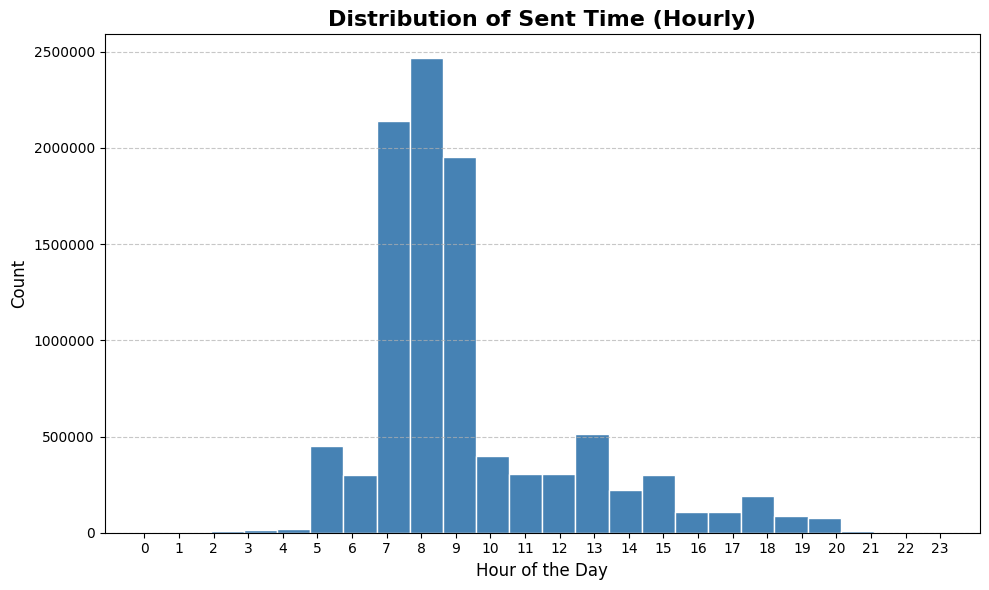

In [24]:
plt.figure(figsize=(10, 6))
messages_df['SENT_AT_HOUR'] = messages_df['SENT_AT'].dt.hour

# Calculate the counts for each hour
hourly_counts = messages_df['SENT_AT_HOUR'].value_counts()

plt.hist(messages_df['SENT_AT_HOUR'], bins=24, color='steelblue', edgecolor='white')

plt.title('Distribution of Sent Time (Hourly)', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Format y-axis labels in millions
plt.ticklabel_format(style='plain', axis='y', scilimits=(6, 6))
plt.gca().yaxis.get_major_formatter().set_scientific(False)

plt.xticks(range(0, 24))
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [25]:
def time_periods(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    else:
        return 'Evening'
    
#Apply the custom function to the 'hour' column and create a new 'period' column
messages_df['TimePeriod'] = messages_df['SENT_AT_HOUR'].apply(time_periods)

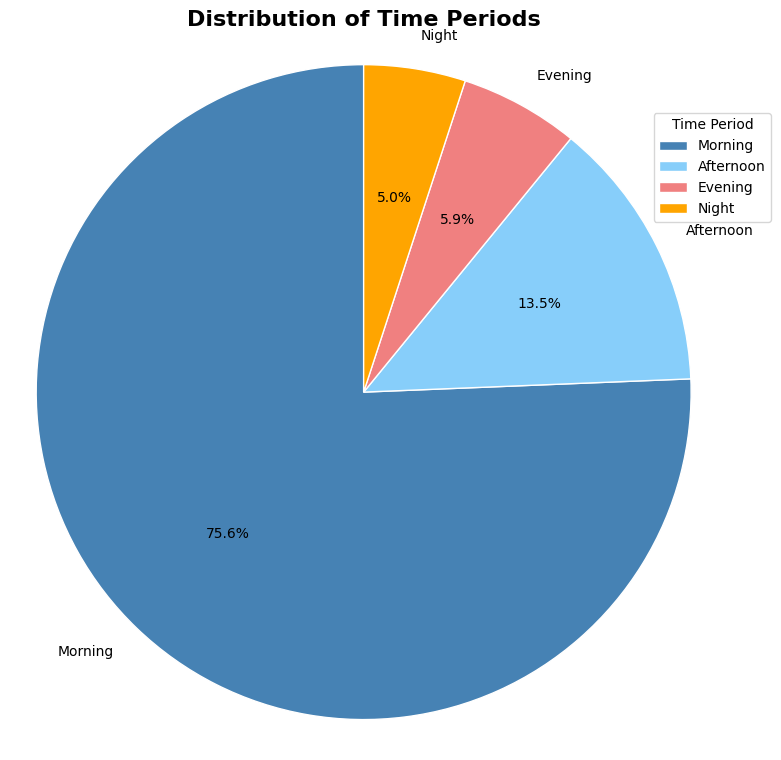

In [26]:
# Assuming you have a DataFrame named 'messages_df' with a column named 'TimePeriod'
plt.figure(figsize=(8, 8))
time_period_counts = messages_df['TimePeriod'].value_counts()

# Define custom colors for the pie chart
colors = ['steelblue', 'lightskyblue', 'lightcoral','orange']

plt.pie(time_period_counts, labels=time_period_counts.index, autopct='%1.1f%%', startangle=90,
        colors=colors, wedgeprops={'edgecolor': 'white'})

plt.title('Distribution of Time Periods', fontsize=16, fontweight='bold')
plt.axis('equal')

# Add a legend with custom colors and title
legend_labels = time_period_counts.index
plt.legend(legend_labels, title='Time Period', loc='best', bbox_to_anchor=(0.9, 0.9))

plt.tight_layout()
plt.show()

platform (4 categories)
is_clicked ()
is_opened()
is_unsubscribed()
clicked_first_time_at
unsubscribed_at
purchased_at


In [28]:
cursor.close()
conn.close()